#Tugas Besar 2 Classification
**Dita Noviyanti (1301194125)**

**Rafly Ahmad Yanuar(1301194119)**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from collections import defaultdict, Counter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns

#Upload dataset

In [2]:
#upload data melalui amount gdrive

from google.colab import drive
drive.mount('/content/drive')

df_train = pd.read_excel('/content/drive/My Drive/ml/kendaraan_train.xlsx')
df_test = pd.read_excel('/content/drive/My Drive/ml/kendaraan_test.xlsx')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#upload data melalui excel
'''
df_train = pd.read_excel('kendaraan_train.xlsx')
df_test = pd.read_excel('kendaraan_test.xlsx')
'''

"\ndf_train = pd.read_excel('kendaraan_train.xlsx')\ndf_test = pd.read_excel('kendaraan_test.xlsx')\n"

In [4]:
#melihat dataset train
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [5]:
#melihat dataset test
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,22,1,52,0,1-2 Tahun,Pernah,32895,124,71,1
1,Pria,54,1,52,0,1-2 Tahun,Pernah,43388,124,198,0
2,Wanita,24,1,52,0,1-2 Tahun,Pernah,45032,124,171,0
3,Wanita,78,1,52,0,> 2 Tahun,Pernah,42825,26,208,1
4,Wanita,45,1,52,0,1-2 Tahun,Pernah,2630,26,228,0


#Preprocessing dataset train

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [7]:
#chek missing value pada data train
df_train.isna().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [8]:
#chek persentase nilai masing-masing missing value
length = len(df_train)
count = df_train.count()
jumlh_missingValue = ((length - count)/length).round(4)*100
print(jumlh_missingValue)

id                   0.00
Jenis_Kelamin        5.05
Umur                 4.97
SIM                  5.04
Kode_Daerah          5.01
Sudah_Asuransi       4.98
Umur_Kendaraan       4.99
Kendaraan_Rusak      4.96
Premi                5.10
Kanal_Penjualan      5.00
Lama_Berlangganan    4.90
Tertarik             0.00
dtype: float64


In [9]:
#chek data yang duplicate (noise data)
duplicate = list(df_train.duplicated())
print("Data Duplikasi :", duplicate.count(True))
#df_train.drop_duplicates(inplace=True)

Data Duplikasi : 0


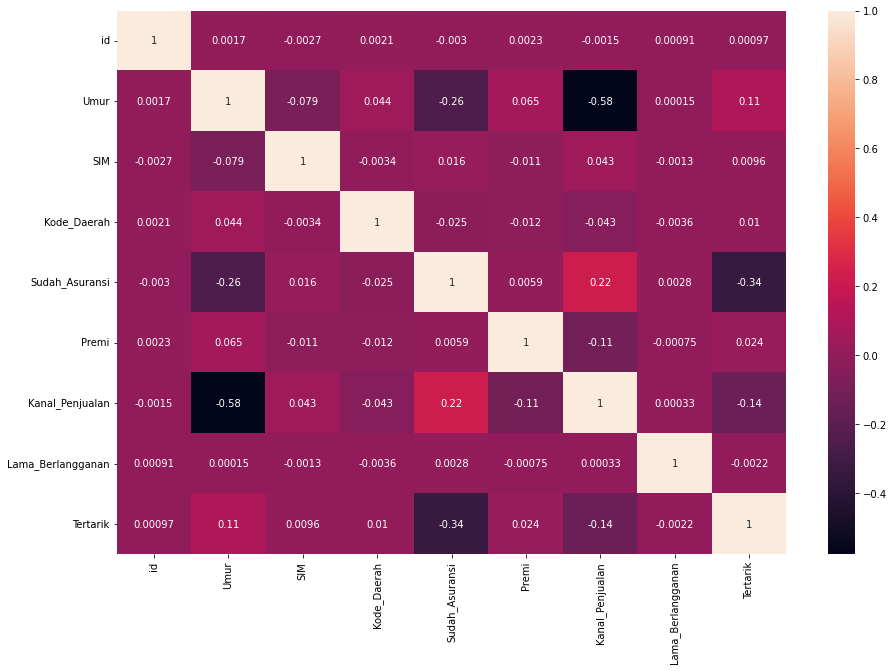

In [10]:
#melihat korelasi 
df_korrel = df_train.corr()
fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(df_korrel,annot=True, ax=ax)

#Chek Outlier dataset train

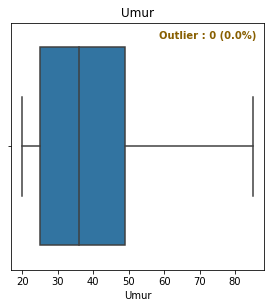

In [11]:
#melihat apakah ada outlier
def findOutliner(x):
  Q1 = x.quantile(0.25)
  Q3 = x.quantile(0.75)
  IQR = Q3 - Q1

  count=((x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))).sum()
  percentage=round(((count/len(x))*100),2)
  return count,percentage

#Attribute umur
plt.figure(figsize=(10, 10))
ax1=plt.subplot(221)
sns.boxplot(data=df_train,x='Umur')
plt.text(x=0.97, y=0.97,transform=ax1.transAxes,s=f"Outlier : {findOutliner(df_train['Umur'])[0]} ({findOutliner(df_train['Umur'])[1]}%)",\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.title("Umur")
plt.show()

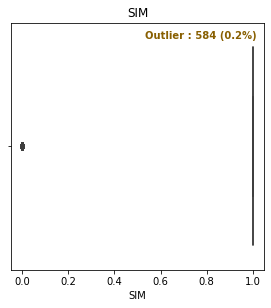

In [12]:
#Attribute SIM
plt.figure(figsize=(10, 10))
ax1=plt.subplot(221)
sns.boxplot(data=df_train,x='SIM')
plt.text(x=0.97, y=0.97,transform=ax1.transAxes,s=f"Outlier : {findOutliner(df_train['SIM'])[0]} ({findOutliner(df_train['SIM'])[1]}%)",\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.title("SIM")
plt.show()

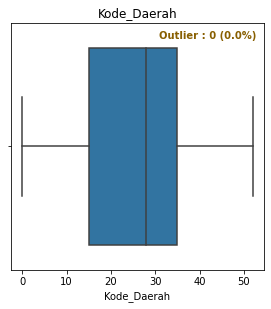

In [13]:
#Attribute Kode Daerah
plt.figure(figsize=(10, 10))
ax1=plt.subplot(221)
sns.boxplot(data=df_train,x='Kode_Daerah')
plt.text(x=0.97, y=0.97,transform=ax1.transAxes,s=f"Outlier : {findOutliner(df_train['Kode_Daerah'])[0]} ({findOutliner(df_train['Kode_Daerah'])[1]}%)",\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.title("Kode_Daerah")
plt.show()

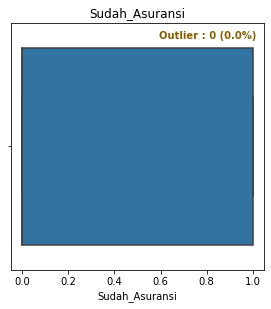

In [14]:
#Attribute Sudah Asuransi
plt.figure(figsize=(10, 10))
ax1=plt.subplot(221)
sns.boxplot(data=df_train,x='Sudah_Asuransi')
plt.text(x=0.97, y=0.97,transform=ax1.transAxes,s=f"Outlier : {findOutliner(df_train['Sudah_Asuransi'])[0]} ({findOutliner(df_train['Sudah_Asuransi'])[1]}%)",\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.title('Sudah_Asuransi')
plt.show()

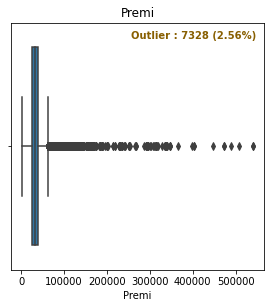

In [15]:
#Attribute Premi
plt.figure(figsize=(10, 10))
ax1=plt.subplot(221)
sns.boxplot(data=df_train,x='Premi')
plt.text(x=0.97, y=0.97,transform=ax1.transAxes,s=f"Outlier : {findOutliner(df_train['Premi'])[0]} ({findOutliner(df_train['Premi'])[1]}%)",\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.title('Premi')
plt.show()

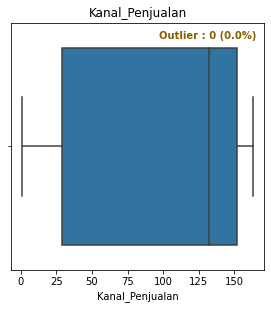

In [16]:
#Attribute Kanal Penjualan
plt.figure(figsize=(10, 10))
ax1=plt.subplot(221)
sns.boxplot(data=df_train,x='Kanal_Penjualan')
plt.text(x=0.97, y=0.97,transform=ax1.transAxes,s=f"Outlier : {findOutliner(df_train['Kanal_Penjualan'])[0]} ({findOutliner(df_train['Kanal_Penjualan'])[1]}%)",\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.title("Kanal_Penjualan")
plt.show()

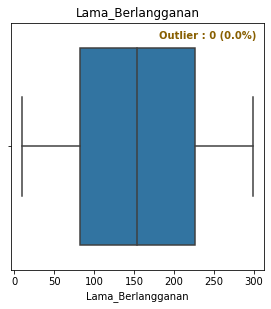

In [17]:
#Attribute Lama Berlangganan
plt.figure(figsize=(10, 10))
ax1=plt.subplot(221)
sns.boxplot(data=df_train,x='Lama_Berlangganan')
plt.text(x=0.97, y=0.97,transform=ax1.transAxes,s=f"Outlier : {findOutliner(df_train['Lama_Berlangganan'])[0]} ({findOutliner(df_train['Lama_Berlangganan'])[1]}%)",\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.title('Lama_Berlangganan')
plt.show()

#Handling missing value dataset train

In [18]:
df_train['Umur']=df_train['Umur'].fillna(df_train['Umur'].mode()[0])

In [19]:
df_train['Jenis_Kelamin']=df_train['Jenis_Kelamin'].fillna(df_train['Jenis_Kelamin'].mode()[0])

In [20]:
df_train['Kode_Daerah']=df_train['Kode_Daerah'].fillna(df_train['Kode_Daerah'].mode()[0])

In [21]:
df_train['SIM']=df_train['SIM'].fillna(df_train['SIM'].mode()[0])

In [22]:
df_train['Sudah_Asuransi']=df_train['Sudah_Asuransi'].fillna(df_train['Sudah_Asuransi'].mode()[0])

In [23]:
df_train['Umur_Kendaraan']=df_train['Umur_Kendaraan'].fillna(df_train['Umur_Kendaraan'].mode()[0])

In [24]:
df_train['Kendaraan_Rusak']=df_train['Kendaraan_Rusak'].fillna(df_train['Kendaraan_Rusak'].mode()[0])

In [25]:
df_train['Kanal_Penjualan']=df_train['Kanal_Penjualan'].fillna(df_train['Kanal_Penjualan'].mean())

In [26]:
df_train['Lama_Berlangganan']=df_train['Lama_Berlangganan'].fillna(df_train['Lama_Berlangganan'].mode()[0])

In [27]:
#ubah outlier jadi Q3 aja pada att premi
Q1 = df_train['Premi'].quantile(0.25)
Q3 = df_train['Premi'].quantile(0.75)
IQR = Q3 - Q1

df_train.loc[df_train['Premi']>(Q3+ 1.5 * IQR),'Premi']=Q3

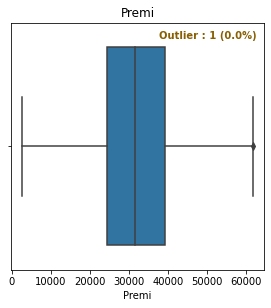

In [28]:
plt.figure(figsize=(10, 10))
ax1=plt.subplot(221)
sns.boxplot(data=df_train,x='Premi')
plt.text(x=0.97, y=0.97,transform=ax1.transAxes,s=f"Outlier : {findOutliner(df_train['Premi'])[0]} ({findOutliner(df_train['Premi'])[1]}%)",\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.title('Premi')
plt.show()

In [29]:
df_train['Premi']=df_train['Premi'].fillna(df_train['Premi'].mean())

In [30]:
#chek missing value
df_train.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

#Preprocessing dataset test

In [31]:
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,22,1,52,0,1-2 Tahun,Pernah,32895,124,71,1
1,Pria,54,1,52,0,1-2 Tahun,Pernah,43388,124,198,0
2,Wanita,24,1,52,0,1-2 Tahun,Pernah,45032,124,171,0
3,Wanita,78,1,52,0,> 2 Tahun,Pernah,42825,26,208,1
4,Wanita,45,1,52,0,1-2 Tahun,Pernah,2630,26,228,0


In [32]:
#chek info dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


In [33]:
#chek missing value
df_test.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

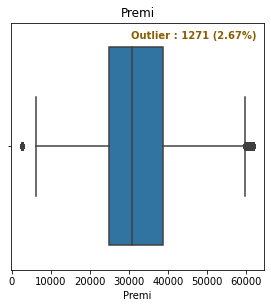

In [34]:
#mencari nilai outlier
def findOutliner(x):
  Q1 = x.quantile(0.25)
  Q3 = x.quantile(0.75)
  IQR = Q3 - Q1

  count=((x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))).sum()
  percentage=round(((count/len(x))*100),2)
  return count,percentage

plt.figure(figsize=(10, 10))
ax1=plt.subplot(221)
sns.boxplot(data=df_train,x='Premi')
plt.text(x=0.97, y=0.97,transform=ax1.transAxes,s=f"Outlier : {findOutliner(df_test['Premi'])[0]} ({findOutliner(df_test['Premi'])[1]}%)",\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.title('Premi')
plt.show()

kami melakukan chek outlier pada seluruh kolom dan hanya premi yang memiliki nilai outlier sehingga hanya premi yang kami tampilkan dalam hal ini

karna msh dekat dengan batas atas jd diabaikan sehingga tidak di handle

#Labeling dan Scalling

In [35]:
#melihat attribute yang bertipe categorical pada dataset train
df_train.select_dtypes('object')

,Jenis_Kelamin,Umur_Kendaraan,Kendaraan_Rusak
0,Wanita,< 1 Tahun,Tidak
1,Pria,> 2 Tahun,Pernah
2,Pria,< 1 Tahun,Tidak
3,Wanita,1-2 Tahun,Tidak
4,Pria,> 2 Tahun,Pernah
...,...,...,...
285826,Wanita,< 1 Tahun,Tidak
285827,Wanita,< 1 Tahun,Tidak
285828,Wanita,< 1 Tahun,Tidak
285829,Pria,1-2 Tahun,Tidak


In [36]:
#melihat attribute yang bertipe categorical pada dataset test
df_test.select_dtypes('object')

,Jenis_Kelamin,Umur_Kendaraan,Kendaraan_Rusak
0,Wanita,1-2 Tahun,Pernah
1,Pria,1-2 Tahun,Pernah
2,Wanita,1-2 Tahun,Pernah
3,Wanita,> 2 Tahun,Pernah
4,Wanita,1-2 Tahun,Pernah
...,...,...,...
47634,Pria,1-2 Tahun,Pernah
47635,Pria,1-2 Tahun,Pernah
47636,Pria,< 1 Tahun,Tidak
47637,Wanita,1-2 Tahun,Pernah


In [37]:
def labelingCat(att, columns) :
    tmp = att.copy() #mencopy dataset
    for column in columns :
        valueColomn = tmp[column] #mengambil value dalam kolom
        val1 = [] #nampung value uniqe
        val2 = [] #nampung index dari value uniqe
        for idx, val in enumerate(valueColomn.unique()): 
            val1.append(valueColomn.str.contains(val)) #memasukan data sesuai dengan nilai val
            val2.append(idx) #memasukan index dari yang valueColomn
        valueColomn = np.select(val1, val2)
        tmp[column] = valueColomn
    return tmp


In [38]:
#labeling dataset train
dataCat = ['Jenis_Kelamin', 'Kendaraan_Rusak']
df_train = labelingCat(df_train, dataCat)

In [39]:
'''
<1 tahun : 1
1-2 tahun : 2
> 2 tahun : 3
'''
df_train['Umur_Kendaraan']=df_train['Umur_Kendaraan'].map( {'< 1 Tahun': 2, '1-2 Tahun': 1, '> 2 Tahun':0} ).astype(float)

In [40]:
df_train = df_train.drop(['id'], axis=1)
df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,30.0,1.0,33.0,1.0,2.0,0,28029.0,152.0,97.0,0
1,1,48.0,1.0,39.0,0.0,0.0,1,25800.0,29.0,158.0,0
2,1,21.0,1.0,46.0,1.0,2.0,0,32733.0,160.0,119.0,0
3,0,58.0,1.0,48.0,0.0,1.0,0,2630.0,124.0,63.0,0
4,1,50.0,1.0,35.0,0.0,0.0,1,34857.0,88.0,194.0,0


In [41]:
# scale yang angkanya gedhe (normalisasi dengan min-max scaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[['Umur','Kode_Daerah', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan', 'Umur_Kendaraan']]=scaler.fit_transform(df_train[['Umur','Kode_Daerah', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan','Umur_Kendaraan']])

In [42]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,0.153846,1.0,0.634615,1.0,1.0,0,0.428914,0.932099,0.301038,0
1,1,0.430769,1.0,0.750000,0.0,0.0,1,0.391273,0.172840,0.512111,0
2,1,0.015385,1.0,0.884615,1.0,1.0,0,0.508351,0.981481,0.377163,0
3,0,0.584615,1.0,0.923077,0.0,0.5,0,0.000000,0.759259,0.183391,0
4,1,0.461538,1.0,0.673077,0.0,0.0,1,0.544219,0.537037,0.636678,0


data test

In [43]:
#labeling dataset test
dataCat= ['Jenis_Kelamin', 'Kendaraan_Rusak']
df_test = labelingCat(df_test, dataCat)

In [44]:
'''
<1 tahun : 1
1-2 tahun : 2
> 2 tahun : 3
'''
df_test['Umur_Kendaraan']=df_test['Umur_Kendaraan'].map( {'< 1 Tahun': 2, '1-2 Tahun': 1, '> 2 Tahun':0} ).astype(float)

In [45]:
# scale yang angkanya gedhe (normalisasi dengan min-max scaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_test[['Jenis_Kelamin','Umur','SIM','Kode_Daerah','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan','Tertarik']]=scaler.fit_transform(df_test[['Jenis_Kelamin','Umur','SIM','Kode_Daerah','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan','Tertarik']])

In [46]:
df_test.head(3)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,0.030769,1.0,1.0,0.0,0.5,0.0,0.056303,0.759259,0.211073,1.0
1,1.0,0.523077,1.0,1.0,0.0,0.5,0.0,0.075824,0.759259,0.650519,0.0
2,0.0,0.061538,1.0,1.0,0.0,0.5,0.0,0.078882,0.759259,0.557093,0.0


In [47]:
df_train.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      285831 non-null  int64  
 1   Umur               285831 non-null  float64
 2   SIM                285831 non-null  float64
 3   Kode_Daerah        285831 non-null  float64
 4   Sudah_Asuransi     285831 non-null  float64
 5   Umur_Kendaraan     285831 non-null  float64
 6   Kendaraan_Rusak    285831 non-null  int64  
 7   Premi              285831 non-null  float64
 8   Kanal_Penjualan    285831 non-null  float64
 9   Lama_Berlangganan  285831 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 24.0 MB


#Eksport to csv

In [49]:
df_train.to_csv('kendaraan_train_bersih.csv', index=False)
df_test.to_csv('kendaraan_test_bersih.csv', index=False)

#Split data

0    250825
1     35006
Name: Tertarik, dtype: int64


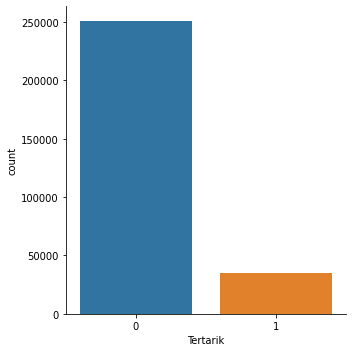

In [50]:
#melihat data 'Tertarik' dan 'Tidak Tertarik'
print(df_train['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df_train, kind='count')

datanya tidak seimbang, dimana data tidak tertarik lebih banyak (melampaui sangat banyak) dari pada yang Tertarik

In [51]:
#split data
X_train = df_train.loc[:, df_train.columns != 'Tertarik']
X_test = df_test.loc[:, df_test.columns  != 'Tertarik']

y_train = df_train['Tertarik']
y_test = df_test['Tertarik']

#Modeling dan testing (evaluasi testing)

#Naive Bayes : Gaussian 

In [52]:
class gaussian_naiveBayes_cls:
    
    def __init__(self): #function contstructor
        
        self.probClass = defaultdict(float) #variabel untuk menampung probabilitas tiap class
        self.condMeans = defaultdict(lambda: defaultdict(float)) #menampung nilai mean
        self.condStd = defaultdict(lambda: defaultdict(float)) #menampung nilai std
        self.log_probClass = defaultdict(float) #menampung nilai log dari probabilitas
        self.data = None #data
        
    def gaussianCal(self, x, mu=0, sig=1): #function untuk menghitung kalkulasi gaussian

        #x itu value untuk mencari probabilitas
        #mu mean dari value pada setiap feature di data training
        #sig standar deviation pada setiap fitur di data training
        norm = 1/(np.sqrt(2*np.pi*sig**2))
        return norm*np.exp(-(x-mu)**2/(2*sig**2))
    
    def fit_model(self, X, y): #fit data

        X = self.convert_to_array(X)
        y = self.pandas_to_numpy(y)
        self.data = X.shape[1]
        
        self.classes = np.unique(y) #mencari nilai unik pada data train (y_train)
        
        for cl in self.classes:
            self.probClass[cl] = len(y[y == cl])/len(y) #menghitung probabiliti setiap class
            self.probClass[cl] = np.log(self.probClass[cl]) #melakukan log
            filter = (y == cl) 
            filterData = X[filter]
            for col in range(self.data):
                self.condMeans[cl][col] = np.mean(filterData.T[col]) #mengambil mean dan memasukannya pada dict condMeans
                self.condStd[cl][col] = np.std(filterData.T[col]) #mengambil std dan memasukannya pada dict condstd
                
    def predict(self, X):

        return self._pred(X, mode="predict") #mengembalikan classification untuk prediksi
    
    def predictProba(self, X):

        return self._pred(X, mode="predictProba") #mengembalikan nilai probabilitas tiap class dalam prediksi
    
    def predict_logProba(self, X):

        return self._pred(X, mode="predict_logProba") #mengembalikan nilai log probabilitas dari setiap kelas
    
    def _pred(self, X, mode="predict"):

        '''
        untuk setiap data dilakukan perhitungan probabilitas pada setiap kelas. 
        Dengan mengambil probabilitas sample pada setiap value per feature kemudian
        digabungkan dengan class probabilitynya. 
        mode adalah jenis prediksi yang akan dikembalikan
        '''
        X = self.convert_to_array(X)
        reslt = [] #menampung hasil 
        for row in X: #looping setiap baris dalam data 
            blf = [] #menampung probalitas dan class
            for cl in self.classes:
                prob_forClass = self.log_probClass[cl] #melakukan perhitungan log
                for col in range(self.data):
                    if self.condStd[cl][col]:
                        p = self.gaussianCal(row[col],mu=self.condMeans[cl][col],sig=self.condStd[cl][col]) #perhitungan gaussian
                        logp = np.log(p)
                        prob_forClass += logp
                blf.append([cl, prob_forClass])
            
            #memasukan prediksi class kedalam var reslt
            if mode == "predict_logProba":
                _, log_probs = zip(*blf)
                reslt.append(log_probs)
                
            elif mode == "predictProba":
                _, probs = zip(*blf)
                unlog_probs = np.exp(probs)
                normed_probs = unlog_probs/np.sum(unlog_probs)
                reslt.append(normed_probs)
                print(normed_probs)
            else:
                sort_blf= sorted(blf, key=lambda x: x[1], reverse=True)
                reslt.append(sort_blf[0][0])
        
        return reslt
    
    def accuracy(self, X, y): #menghitung nilai accuracy

        pred = self.predict(X)
        correct = 0
        for i,j in zip(y,pred):
            if i == j:
                correct+=1
        return float(correct)/float(len(y))
      
    def pandas_to_numpy(self, x):

        if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series(dtype=float)):
            return x.values
        if type(x) == type(np.array([1,2])):
            return x
        return np.array(x) 
    
    def handle_oneDimenData(self,x):

        if x.ndim == 1:
            x = x.reshape(-1,1)
        return x
    
    def convert_to_array(self, x):
      
        x = self.pandas_to_numpy(x)
        x = self.handle_oneDimenData(x)
        return x

In [53]:
nb = gaussian_naiveBayes_cls()
nb.fit_model(X_train,y_train)
print(f"Accuracy: {round(nb.accuracy(X_test,y_test)*100, 2)}")

Accuracy: 81.84


In [54]:
predictions = nb.predict(X_test)

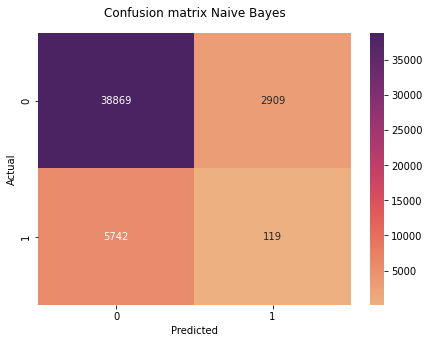


               precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     41778
         1.0       0.04      0.02      0.03      5861

    accuracy                           0.82     47639
   macro avg       0.46      0.48      0.46     47639
weighted avg       0.77      0.82      0.79     47639




In [55]:
from sklearn.metrics import confusion_matrix, classification_report


resultNB = predictions

conf_matrix = confusion_matrix(y_test, resultNB) 
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion matrix Naive Bayes', pad=16)
plt.show()

print("\n", classification_report(y_test, resultNB), end="\n\n")


#Logistic linear

In [56]:
class LogisticRegression_cls:
    def __init__(self, trainingRate=0.01, iters=1000):
        self.trR = trainingRate  #mendefinisikan training rate
        self.n_iters = iters #iterasi
        self.w = None  #weight
        self.b = None  #bias

    def fit_model(self, X, y):
        sample_n, feature = X.shape

        # init parameters
        self.w = np.zeros(feature) #weight di assign 0
        self.b = 0 #bias di assign 0

        # gradient descent
        for i in range(self.n_iters):
            # menghitung model linear 
            modeLinear = np.dot(X, self.w) + self.b
            # apply sigmoid function
            y_Pred = self._sigmoid(modeLinear)

            # menghitung gradient
            dw = (1 / sample_n) * np.dot(X.T, (y_Pred - y))
            db = (1 / sample_n) * np.sum(y_Pred - y)
            # update weight dan bias
            self.w -= self.trR * dw
            self.b -= self.trR * db

    def predict_data(self, X):
        modeLinear = np.dot(X, self.w) + self.b
        y_Pred = self._sigmoid(modeLinear) #menghitung nilai sigmoid
        y_Pred_clF = [1 if i >= 0.5 else 0 for i in y_Pred] #menampung hasil prediksi
        return np.array(y_Pred_clF )

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x)) #perhitungan sigmoid


In [57]:
def accuracy(y_true, y_pred): #menghitung accuracy
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
        
lr = LogisticRegression_cls(trainingRate=0.001, iters=1000)
lr.fit_model(X_train, y_train)
predLR = lr.predict_data(X_test)
acc = accuracy(y_test, predLR)
print(acc)

0.8769705493398267


In [58]:
print(f"Accuracy: {round(acc*100, 2)}")

Accuracy: 87.7


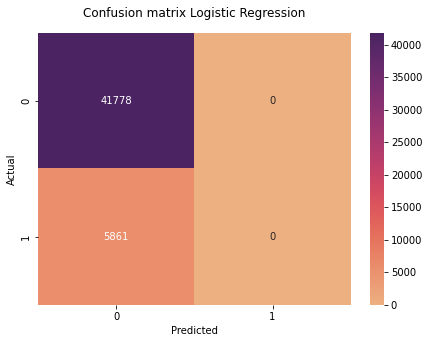


               precision    recall  f1-score   support

         0.0       0.88      1.00      0.93     41778
         1.0       0.00      0.00      0.00      5861

    accuracy                           0.88     47639
   macro avg       0.44      0.50      0.47     47639
weighted avg       0.77      0.88      0.82     47639




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
from sklearn.metrics import confusion_matrix, classification_report

restLR = predLR

conf_matrix = confusion_matrix(y_test, restLR) 
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion matrix Logistic Regression', pad=16)
plt.show()

print("\n", classification_report(y_test, restLR), end="\n\n")

#Eksperiment 1

**OVERSAMPLING**

In [60]:
from imblearn.over_sampling import SMOTE

print("sebelum oversampling: ",Counter(y_train))
SMOTE = SMOTE()

# fit dan transform data training
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
print("Setelah oversampling: ",Counter(y_train_SMOTE))

sebelum oversampling:  Counter({0: 250825, 1: 35006})
Setelah oversampling:  Counter({0: 250825, 1: 250825})


**Logistic Regresion**

In [61]:
#tes dengan pemodelan
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
lrOVR = LogisticRegression_cls(trainingRate=0.001, iters=1000)
lrOVR.fit_model(X_train_SMOTE, y_train_SMOTE)
predLROVR = lrOVR.predict_data(X_test)
accLRO = accuracy(y_test, predLROVR)
print(accLRO)

0.8092739142299377


In [62]:
print(f"Accuracy: {round(accLRO*100, 2)}")

Accuracy: 80.93


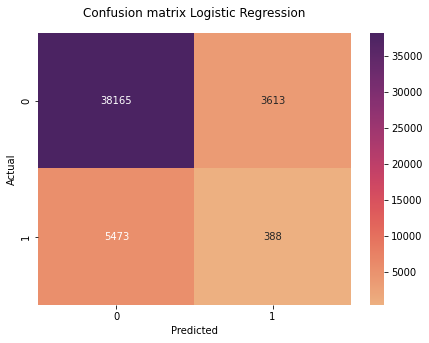


               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     41778
         1.0       0.10      0.07      0.08      5861

    accuracy                           0.81     47639
   macro avg       0.49      0.49      0.49     47639
weighted avg       0.78      0.81      0.79     47639




In [63]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score

restLROVR = predLROVR

conf_matrix = confusion_matrix(y_test, restLROVR) 
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion matrix Logistic Regression', pad=16)
plt.show()

print("\n", classification_report(y_test, restLROVR), end="\n\n")

**Naive Bayes**

In [64]:
nbOVR = gaussian_naiveBayes_cls()
nbOVR.fit_model(X_train_SMOTE,y_train_SMOTE)
print(f"Accuracy: {round(nbOVR.accuracy(X_test,y_test)*100, 2)}")

Accuracy: 81.84


In [65]:
predictionsOVR = nbOVR.predict(X_test)

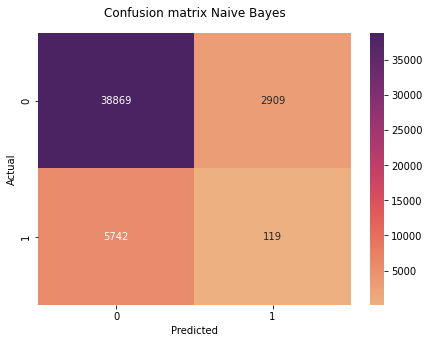


               precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     41778
         1.0       0.04      0.02      0.03      5861

    accuracy                           0.82     47639
   macro avg       0.46      0.48      0.46     47639
weighted avg       0.77      0.82      0.79     47639




In [66]:
from sklearn.metrics import confusion_matrix, classification_report


resultNBOVR = predictionsOVR

conf_matrix = confusion_matrix(y_test, resultNBOVR) 
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion matrix Naive Bayes', pad=16)
plt.show()

print("\n", classification_report(y_test, resultNBOVR), end="\n\n")


#Eksperiment 2

**UNDERSAMPLING**

In [67]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

print("sebelum undersampling: ", Counter(y_train))
#fit dan transform data training
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
print("setelah undersampling: ", Counter(y_train_under))

sebelum undersampling:  Counter({0: 250825, 1: 35006})
setelah undersampling:  Counter({0: 35006, 1: 35006})


**Logistic Regresion**

In [68]:
#tes dengan pemodelan
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
lrUNDR = LogisticRegression_cls(trainingRate=0.001, iters=1000)
lrUNDR.fit_model(X_train_under, y_train_under)
predLRUNDR = lrUNDR.predict_data(X_test)
accLRU = accuracy(y_test, predLRUNDR)
print(accLRU)

0.8089800373643443


In [69]:
print(f"Accuracy: {round(accLRU*100, 2)}")

Accuracy: 80.9


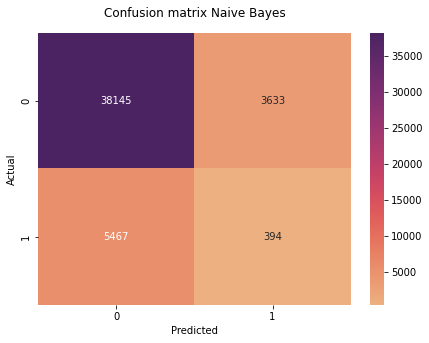


               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     41778
         1.0       0.10      0.07      0.08      5861

    accuracy                           0.81     47639
   macro avg       0.49      0.49      0.49     47639
weighted avg       0.78      0.81      0.79     47639




In [70]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score

restLUNDR = predLRUNDR

conf_matrix = confusion_matrix(y_test, restLUNDR) 
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion matrix Naive Bayes', pad=16)
plt.show()

print("\n", classification_report(y_test, restLUNDR), end="\n\n")

**Naive Bayes**

In [71]:
nbUNDR = gaussian_naiveBayes_cls()
nbUNDR.fit_model(X_train_under,y_train_under)
print(f"Accuracy: {round(nbUNDR.accuracy(X_test,y_test)*100, 2)}")

Accuracy: 81.84


In [72]:
predictionsUNDR = nbUNDR.predict(X_test)

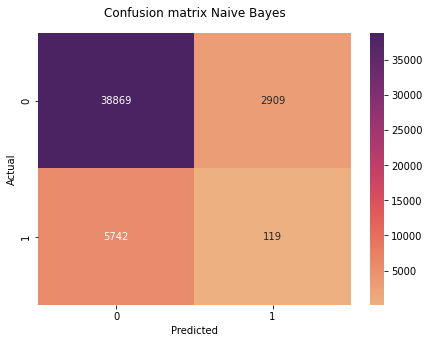


               precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     41778
         1.0       0.04      0.02      0.03      5861

    accuracy                           0.82     47639
   macro avg       0.46      0.48      0.46     47639
weighted avg       0.77      0.82      0.79     47639




In [73]:
from sklearn.metrics import confusion_matrix, classification_report


resultNBUNDR = predictionsUNDR

conf_matrix = confusion_matrix(y_test, resultNBUNDR) 
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion matrix Naive Bayes', pad=16)
plt.show()

print("\n", classification_report(y_test, resultNBUNDR), end="\n\n")


#Prediction

**Naive Bayes**

In [74]:
print(predictions)
print("jumlah nilai Tertarik: ",predictions.count(1))
print("jumlah nilai Tidak Tertarik: ",predictions.count(0))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

**Logistic Regression**

In [75]:
print(predLR)
print("jumlah nilai Tertarik: ",np.count_nonzero(predLR == 1))
print("jumlah nilai Tidak Tertarik: ",np.count_nonzero(predLR == 0))

[0 0 0 ... 0 0 0]
jumlah nilai Tertarik:  0
jumlah nilai Tidak Tertarik:  47639


**Logistic Regression (Undersampling)**

In [76]:
print(predLRUNDR)
print("jumlah nilai Tertarik: ",np.count_nonzero(predLRUNDR == 1))
print("jumlah nilai Tidak Tertarik: ",np.count_nonzero(predLRUNDR == 0))

[0 0 0 ... 0 0 0]
jumlah nilai Tertarik:  4027
jumlah nilai Tidak Tertarik:  43612


**Logistic Regression (Oversampling)**

In [77]:
print(predLROVR)
print("jumlah nilai Tertarik: ",np.count_nonzero(predLROVR == 1))
print("jumlah nilai Tidak Tertarik: ",np.count_nonzero(predLROVR == 0))

[0 0 0 ... 0 0 0]
jumlah nilai Tertarik:  4001
jumlah nilai Tidak Tertarik:  43638


#Visualisasi

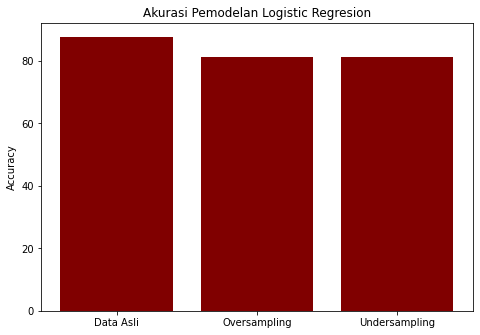

In [80]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Logistic_Regression = ['Data Asli', 'Oversampling', 'Undersampling']
Accuracy = [87.7,81,81]
plt.bar(Logistic_Regression, Accuracy, color ='maroon')
plt.ylabel("Accuracy")
plt.title("Akurasi Pemodelan Logistic Regresion")
plt.show()

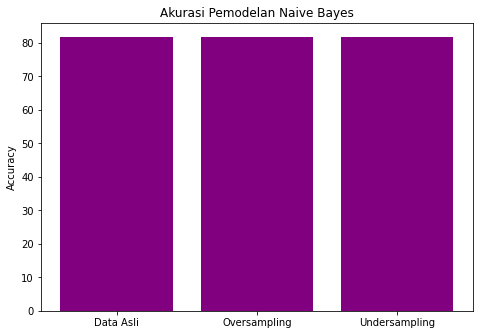

In [79]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Naive_Bayes = ['Data Asli', 'Oversampling', 'Undersampling']
Accuracy = [81.84,81.84,81.84]
ax.bar(Naive_Bayes,Accuracy, color='purple')
plt.ylabel("Accuracy")
plt.title("Akurasi Pemodelan Naive Bayes")
plt.show()

#Kesimpulan

Disimpulkan jika pemodelan yang terbaik untuk dataset kendaraan dari dua pemodelan tersebut adalah naive bayes, baik dalam akurasi maupun performansi